# Efficient weighted and unweighted [harmonic centrality](https://en.wikipedia.org/wiki/Centrality#Harmonic_centrality) with [GRAPE](https://github.com/AnacletoLAB/grape)
In this tutorial, we will explore the concept of [harmonic centrality](https://en.wikipedia.org/wiki/Centrality#Harmonic_centrality) and its importance in network analysis. By the end of this tutorial, you will have a good understanding of how to compute [harmonic centrality](https://en.wikipedia.org/wiki/Centrality#Harmonic_centrality) and apply it to your own network analysis projects using [GRAPE](https://github.com/AnacletoLAB/grape).

Note that we already covered in a previous tutorial [the closeness centrality](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Efficient%20Weighted%20and%20Unweighted%20Closeness%20Centrality%20with%20GRAPE.ipynb) and [how to use HyperBall to compute approximated closeness and harmonic centralities in large graphs](https://github.com/AnacletoLAB/grape/blob/main/tutorials/HyperBall-based%20approximated%20Harmonic%20and%20Closeness%20with%20GRAPE.ipynb) - Consider checking them out after this tutorial.

## Understanding Graphs and Their Significance

A graph is a fundamental concept in network analysis that represents the relationships or connections between entities. It consists of a set of nodes (also known as vertices) connected by edges (also known as links or relationships). Graphs provide a powerful framework for modeling and analyzing complex systems in various fields, including social networks, transportation networks, biological networks, and information networks.

The significance of graphs lies in their ability to capture the structure, dynamics, and interdependencies within a system. By representing entities as nodes and their relationships as edges, graphs enable us to study the patterns of connections, identify important nodes or clusters, and understand how information, influence, or resources flow through the network.

Analyzing graphs can help us gain insights into a wide range of real-world phenomena. For example, in a social network, graph analysis can reveal influential individuals or communities, uncover patterns of information diffusion, or detect potential opinion leaders. In transportation networks, graph analysis can identify critical hubs, optimize routes, or evaluate the robustness of the infrastructure.

## Understanding Centralities in Network Analysis
Centralities are measures used in network analysis to assess the importance or centrality of nodes within a network. They provide a quantitative way to rank or compare the significance of nodes based on their structural properties and relationships with other nodes.

There are various types of centralities, each capturing a different aspect of node importance. Some common centralities include [degree centrality](https://en.wikipedia.org/wiki/Centrality#Degree_centrality), [betweenness centrality](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Efficient%20Betweenness%20Centrality%20with%20GRAPE.ipynb), [closeness centrality](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Efficient%20Weighted%20and%20Unweighted%20Closeness%20Centrality%20with%20GRAPE.ipynb), and [eigenvector centrality](https://en.wikipedia.org/wiki/Eigenvector_centrality).

* Degree centrality measures the number of connections a node has. Nodes with high degree centrality are well-connected to many other nodes and often play important roles in information diffusion or resource sharing.
* [Betweenness centrality](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Efficient%20Betweenness%20Centrality%20with%20GRAPE.ipynb) identifies nodes that act as bridges or intermediaries between other nodes. Nodes with high betweenness centrality have a significant influence on the flow of information or resources in the network, as they lie on many shortest paths between other nodes.
* [Closeness centrality](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Efficient%20Weighted%20and%20Unweighted%20Closeness%20Centrality%20with%20GRAPE.ipynb) quantifies how quickly a node can reach all other nodes in the network. Nodes with high closeness centrality are closely connected to other nodes and can efficiently communicate information to the entire network.
* [Eigenvector centrality](https://en.wikipedia.org/wiki/Eigenvector_centrality) measures the influence of a node based on the importance of its neighboring nodes. Nodes with high eigenvector centrality are connected to other influential nodes, enhancing their own centrality scores.

By applying different centrality measures, network analysts can gain insights into various aspects of a network's structure and functioning. Centralities help identify key nodes, influential individuals, bottlenecks, or information flow pathways, enabling a better understanding of complex systems and facilitating targeted interventions or optimizations.

## Harmonic centrality
Harmonic centrality is a widely used graph metric in network analysis that helps identify crucial and influential nodes within a network. It quantifies the node's ability to efficiently reach all other nodes by considering the sum of the reciprocals of the shortest path distances from the node to others. Nodes with high harmonic centrality are well-connected to many other nodes, enabling efficient communication across the network.

Mathematically, the harmonic centrality of a node is computed by summing the reciprocals of its shortest path distances to all other nodes. Nodes with shorter distances to others will have higher harmonic centrality values, emphasizing their importance in the network's overall structure and information flow.

$$C_h(v) = \sum_{u \in V\; u \neq v} \frac{1}{d(u, v)}$$

Harmonic centrality proves valuable in various scenarios where directness of communication or accessibility is crucial, such as transportation networks, social networks, and information dissemination systems. For instance, in a transportation network, a node with high harmonic centrality could represent a pivotal hub or a densely populated area with robust transportation links, while a node with low harmonic centrality may signify a remote location with limited connections.

Combining harmonic centrality with other network metrics, such as degree centrality (measuring node connections) and betweenness centrality (assessing a node's role in facilitating communication), offers a more comprehensive understanding of the network's structure and functionality.

We will then demonstrate how to use the [GRAPE](https://github.com/AnacletoLAB/grape) library to compute harmonic centrality on three citation graphs and three protein-protein interaction graphs.

[Find the Rust implementation here](https://github.com/AnacletoLAB/ensmallen/blob/f7c7782d061aa1bb18ea476cf8a1a59def052f96/graph/src/centrality.rs#L227).

### What is the difference between Harmonic and Closeness centrality?
Harmonic centrality and closeness centrality are both important metrics used in network analysis, but they capture different aspects of node importance within a network.

Closeness centrality focuses on the efficiency of information spreading from a given node to all other nodes in the network. It measures how quickly information can travel from a node to others by considering the total shortest path length from that node to all other nodes. A node with high closeness centrality is one that is closely connected to many other nodes and can efficiently communicate information to the rest of the network.

On the other hand, harmonic centrality emphasizes directness of connectivity. It measures the node's ability to reach all other nodes by considering the sum of the reciprocals of the shortest path distances from the node to others. Nodes with high harmonic centrality have shorter distances to other nodes and are thus well-positioned to reach different parts of the network efficiently.

## Weighted harmonic centrality
Weighted harmonic centrality is a variant of the standard harmonic centrality measure that considers the weights or distances between nodes in a network. Unlike the traditional harmonic centrality, which focuses solely on the sum of the reciprocals of the shortest path distances, weighted harmonic centrality utilizes a weighted shortest path algorithm, such as Dijkstra's algorithm, to calculate the harmonic centrality scores while taking into account the weights assigned to the edges. This approach proves valuable in scenarios where edges have varying costs or weights, such as transportation networks with different transportation modes or varying travel times. By incorporating edge weights into the calculation, the weighted harmonic centrality measure provides a more accurate and nuanced assessment of node importance in the network.

[Find the Rust implementation here](https://github.com/AnacletoLAB/ensmallen/blob/f7c7782d061aa1bb18ea476cf8a1a59def052f96/graph/src/centrality.rs#L254)

### Probability-based harmonic centrality with weighted edges
In certain graphs, such as the STRING protein-protein interaction network, the edge weights represent probabilities instead of actual distances or costs. In such cases, the most probable path between two nodes may not necessarily be the shortest path in terms of distance or cost. To account for this, we can adjust the weights of the edges to reflect the likelihood of each path. Specifically, we can convert the edge weights into log-odds scores, which represent the probability of a given path compared to a background probability of all possible paths. By applying a Dijkstra algorithm that utilizes these log-odds scores, we can find the most likely path between two nodes based on their harmonic centrality. Incorporating the probability of each path allows us to obtain a more accurate and informative measure of harmonic centrality in graphs with probabilistic weights. This approach considers both the connectivity and the likelihood of paths, providing a comprehensive analysis of the importance of nodes in the network's structure and function.

## What is [GRAPE](https://github.com/AnacletoLAB/grape)?
🍇🍇 [GRAPE](https://github.com/AnacletoLAB/grape) 🍇🍇 is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![[GRAPE](https://github.com/AnacletoLAB/grape)](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)

## Experiments
In this section, we will present the results of our experiments using the parallel harmonic centrality algorithm implemented in GRAPE. We loaded three citation graphs, Cora, CiteSeer, and PubmedDiabetes, and three protein-protein interaction graphs, Homo Sapiens, Canis Lupus, and Mus Musculus. We will show the harmonic centrality scores of each graph as histograms, which will give us an insight into the centrality of nodes in the network. By comparing the results of these experiments, we will be able to understand the performance of the algorithm on different types of graphs and the distribution of harmonic centrality scores in each graph.

In [1]:
from grape.datasets.linqs import Cora, CiteSeer, PubMedDiabetes, get_words_data

cora = Cora()
citeseer = CiteSeer()
pubmed = PubMedDiabetes()

2023-05-18 18:51:29.990225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-18 18:51:29.990245: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(cora.get_number_of_nodes(), cora.get_number_of_directed_edges(), cora.get_diameter())

(4141, 108988, 6.0)

In [3]:
%%time
cora_harmonic = cora.get_harmonic_centrality()

CPU times: user 1.28 s, sys: 20.9 ms, total: 1.3 s
Wall time: 54.8 ms


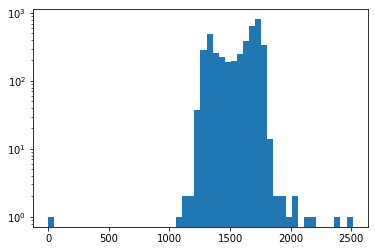

In [4]:
import matplotlib.pyplot as plt

plt.hist(cora_harmonic, bins=50, log=True)
plt.show()

In [5]:
(citeseer.get_number_of_nodes(), citeseer.get_number_of_directed_edges(), citeseer.get_diameter())

(7030, 219558, 6.0)

In [6]:
%%time
citeseer_harmonic = citeseer.get_harmonic_centrality()

CPU times: user 4.17 s, sys: 7.83 ms, total: 4.18 s
Wall time: 175 ms


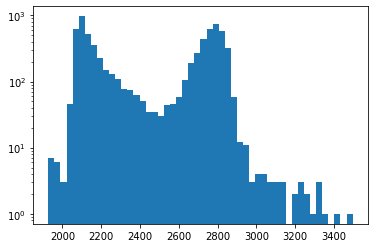

In [7]:
import matplotlib.pyplot as plt

plt.hist(citeseer_harmonic, bins=50, log=True)
plt.show()

In [8]:
(pubmed.get_number_of_nodes(), pubmed.get_number_of_directed_edges(), pubmed.get_diameter())

(20217, 2064713, 4.0)

In [9]:
%%time
pubmed_harmonic = pubmed.get_harmonic_centrality()

CPU times: user 1min 37s, sys: 158 ms, total: 1min 37s
Wall time: 4.12 s


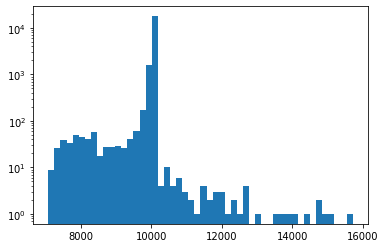

In [10]:
import matplotlib.pyplot as plt

plt.hist(pubmed_harmonic, bins=50, log=True)
plt.show()

In [11]:
from IPython.display import display, HTML, Markdown
from typing import List, Tuple
import matplotlib.pyplot as plt
from ensmallen import Graph
import numpy as np
import pandas as pd
from time import time

def top_ranked_values(
    graph: Graph,
    score: np.ndarray,
    k: int = 10
) -> List[Tuple[float, int]]:
    """Return.
    
    Parameters
    ----------------
    graph: Graph
        The graph whose nodes are to be ranked.
    score: np.ndarray
        The scores to use for the ranking.
    k: int = 10
        Number of values to rank.
    """
    return sorted([
        (
            score[node_id],
            graph.get_node_name_from_node_id(node_id),
        )
        for node_id in np.argpartition(score, -k)[-k:]
    ], reverse=True)


def harmonic_centrality_report(graph: Graph):
    display(Markdown(
        f"## {graph.get_name()}\n"
        f"The current graph, {graph.get_name()}, "
        f"has {graph.get_number_of_nodes()} and "
        f"{graph.get_number_of_directed_edges()} edges. "
        f"The diameter of the graph is {graph.get_diameter()}."
    ))
    
    display(Markdown(
        "### Unweighted harmonic centrality\n"
        "We will now compute the **unweighted** harmonic centrality with the following one-liner:\n"
        "\n\n"
        "```python\n"
        "unweighted_harmonic = graph.get_harmonic_centrality()\n"
        "```\n"
    ))
    
    start = time()
    unweighted_harmonic = graph.get_harmonic_centrality()
    delta = time() - start
    
    display(Markdown(
        f"Computing the unweighted harmonic centrality took {delta:.4} seconds."
    ))
    
    display(Markdown(
        "And let's now display the histogram of the unweighted harmonic centralities:"
    ))
    
    plt.hist(unweighted_harmonic, bins=50, log=True)
    plt.title("Unweighted harmonic centrality")
    plt.show()
    
    display(Markdown(
        "Let's see which of the proteins in this graph have the highest harmonic centrality:"
    ))
    
    display(pd.DataFrame(
        top_ranked_values(graph, unweighted_harmonic),
        columns=["unweighted_harmonic", "protein"]
    ))
    
    display(Markdown(
        "### Weighted harmonic centrality\n"
        "We will now compute the **weighted** harmonic centrality with the following one-liner:\n"
        "\n\n"
        "```python\n"
        "weighted_harmonic = graph.get_weighted_harmonic_centrality()\n"
        "```\n"
    ))
    
    start = time()
    weighted_harmonic = graph.get_weighted_harmonic_centrality()
    delta = time() - start
    
    display(Markdown(
        f"Computing the weighted harmonic centrality took {delta:.4} seconds."
    ))
    
    display(Markdown(
        "And let's now display the histogram of the weighted harmonic centralities:"
    ))
    
    plt.hist(weighted_harmonic, bins=50, log=True)
    plt.title("Weighted harmonic centrality")
    plt.show()
    
    display(Markdown(
        "Let's see which of the proteins in this graph have the highest weighted harmonic centrality:"
    ))
    
    display(pd.DataFrame(
        top_ranked_values(graph, weighted_harmonic),
        columns=["weighted_harmonic", "protein"]
    ))
    
    display(Markdown(
        "### Weight as probabilities harmonic centrality\n"
        "We will now compute the **probability weights** harmonic centrality with the following couple lines:\n"
        "\n\n"
        "```python\n"
        "# First, we normalize the PPI graph weights which go from 100 to 1000\n"
        "graph = graph.divide_edge_weights(1000.0)\n"
        "# then, we compute the centralities\n"
        "probability_harmonic = graph.get_weighted_harmonic_centrality(\n"
        "\tuse_edge_weights_as_probabilities=True\n"
        ")\n"
        "```\n"
    ))
    
    graph = graph.divide_edge_weights(1000.0)

    start = time()
    probability_harmonic = graph.get_weighted_harmonic_centrality(
        use_edge_weights_as_probabilities=True
    )
    delta = time() - start
    
    display(Markdown(
        f"Computing the probability harmonic centrality took {delta:.4} seconds."
    ))
    
    display(Markdown(
        "And let's now display the histogram of the probability harmonic centralities:"
    ))
    
    plt.hist(probability_harmonic, bins=50, log=True)
    plt.title("Log-probability harmonic centrality")
    plt.show()
    
    display(Markdown(
        "Let's see which of the proteins in this graph have the highest log-probability harmonic centrality:"
    ))
    
    display(pd.DataFrame(
        top_ranked_values(graph, probability_harmonic),
        columns=["probability_harmonic", "protein"]
    ))

In [12]:
from grape.datasets.string import HomoSapiens, CanisLupusFamiliaris, MusMusculus

homo_sapiens = HomoSapiens()
doggo = CanisLupusFamiliaris()
mouse = MusMusculus()

# We only keep the main connected component
homo_sapiens = homo_sapiens.remove_components(top_k_components=1)
doggo = doggo.remove_components(top_k_components=1)
mouse = mouse.remove_components(top_k_components=1)

## HomoSapiens
The current graph, HomoSapiens, has 19385 and 11938498 edges. The diameter of the graph is 5.0.

### Unweighted harmonic centrality
We will now compute the **unweighted** harmonic centrality with the following one-liner:


```python
unweighted_harmonic = graph.get_harmonic_centrality()
```


Computing the unweighted harmonic centrality took 28.37 seconds.

And let's now display the histogram of the unweighted harmonic centralities:

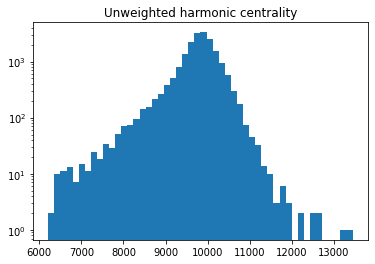

Let's see which of the proteins in this graph have the highest harmonic centrality:

,unweighted_harmonic,protein
0,13443.833008,9606.ENSP00000229239
1,13158.833008,9606.ENSP00000349960
2,12647.833008,9606.ENSP00000451828
3,12588.000000,9606.ENSP00000298910
4,12514.666992,9606.ENSP00000269305
5,12495.000000,9606.ENSP00000479618
6,12223.833008,9606.ENSP00000344456
7,12185.500000,9606.ENSP00000295897
8,11943.500000,9606.ENSP00000275493
9,11904.666992,9606.ENSP00000335153


### Weighted harmonic centrality
We will now compute the **weighted** harmonic centrality with the following one-liner:


```python
weighted_harmonic = graph.get_weighted_harmonic_centrality()
```


Computing the weighted harmonic centrality took 74.91 seconds.

And let's now display the histogram of the weighted harmonic centralities:

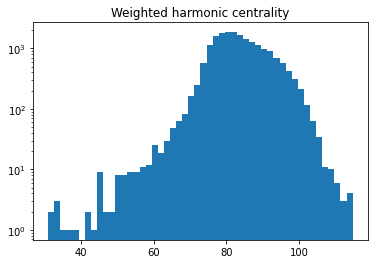

Let's see which of the proteins in this graph have the highest weighted harmonic centrality:

,weighted_harmonic,protein
0,114.757729,9606.ENSP00000332454
1,114.407509,9606.ENSP00000430774
2,114.197151,9606.ENSP00000356530
3,113.959206,9606.ENSP00000355388
4,112.104408,9606.ENSP00000298910
5,111.989975,9606.ENSP00000426103
6,111.562477,9606.ENSP00000367203
7,111.145706,9606.ENSP00000254846
8,111.073425,9606.ENSP00000377086
9,110.814766,9606.ENSP00000351475


### Weight as probabilities harmonic centrality
We will now compute the **probability weights** harmonic centrality with the following couple lines:


```python
# First, we normalize the PPI graph weights which go from 100 to 1000
graph = graph.divide_edge_weights(1000.0)
# then, we compute the centralities
probability_harmonic = graph.get_weighted_harmonic_centrality(
	use_edge_weights_as_probabilities=True
)
```


Computing the probability harmonic centrality took 243.5 seconds.

And let's now display the histogram of the probability harmonic centralities:

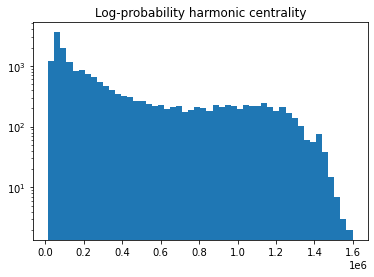

Let's see which of the proteins in this graph have the highest log-probability harmonic centrality:

,probability_harmonic,protein
0,1597828.000,9606.ENSP00000362680
1,1575174.125,9606.ENSP00000263253
2,1556233.000,9606.ENSP00000437955
3,1553341.625,9606.ENSP00000405330
4,1552624.125,9606.ENSP00000344456
5,1529437.875,9606.ENSP00000362649
6,1525341.875,9606.ENSP00000261769
7,1523783.000,9606.ENSP00000269305
8,1523641.500,9606.ENSP00000401303
9,1520046.625,9606.ENSP00000275493


In [13]:
harmonic_centrality_report(homo_sapiens)

## CanisLupusFamiliaris
The current graph, CanisLupusFamiliaris, has 19129 and 8591130 edges. The diameter of the graph is 5.0.

### Unweighted harmonic centrality
We will now compute the **unweighted** harmonic centrality with the following one-liner:


```python
unweighted_harmonic = graph.get_harmonic_centrality()
```


Computing the unweighted harmonic centrality took 20.1 seconds.

And let's now display the histogram of the unweighted harmonic centralities:

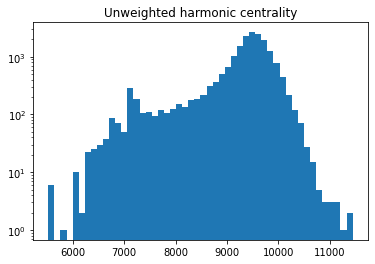

Let's see which of the proteins in this graph have the highest harmonic centrality:

,unweighted_harmonic,protein
0,11445.166992,9615.ENSCAFP00000064590
1,11403.666992,9615.ENSCAFP00000001523
2,11281.000000,9615.ENSCAFP00000007783
3,11196.416992,9615.ENSCAFP00000044065
4,11132.500000,9615.ENSCAFP00000013612
5,11097.333008,9615.ENSCAFP00000005164
6,11026.666992,9615.ENSCAFP00000064230
7,11018.666992,9615.ENSCAFP00000040726
8,10982.166992,9615.ENSCAFP00000014627
9,10878.666992,9615.ENSCAFP00000045099


### Weighted harmonic centrality
We will now compute the **weighted** harmonic centrality with the following one-liner:


```python
weighted_harmonic = graph.get_weighted_harmonic_centrality()
```


Computing the weighted harmonic centrality took 53.52 seconds.

And let's now display the histogram of the weighted harmonic centralities:

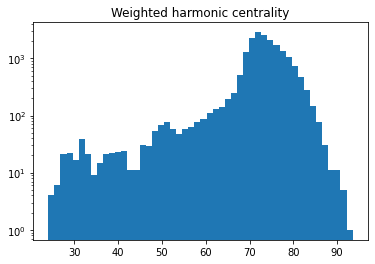

Let's see which of the proteins in this graph have the highest weighted harmonic centrality:

,weighted_harmonic,protein
0,93.530319,9615.ENSCAFP00000051648
1,91.855057,9615.ENSCAFP00000008474
2,91.455566,9615.ENSCAFP00000064590
3,91.325989,9615.ENSCAFP00000001523
4,91.258125,9615.ENSCAFP00000037954
5,90.769127,9615.ENSCAFP00000016954
6,90.669670,9615.ENSCAFP00000045099
7,90.123260,9615.ENSCAFP00000019912
8,90.106773,9615.ENSCAFP00000037790
9,90.097122,9615.ENSCAFP00000044959


### Weight as probabilities harmonic centrality
We will now compute the **probability weights** harmonic centrality with the following couple lines:


```python
# First, we normalize the PPI graph weights which go from 100 to 1000
graph = graph.divide_edge_weights(1000.0)
# then, we compute the centralities
probability_harmonic = graph.get_weighted_harmonic_centrality(
	use_edge_weights_as_probabilities=True
)
```


Computing the probability harmonic centrality took 171.7 seconds.

And let's now display the histogram of the probability harmonic centralities:

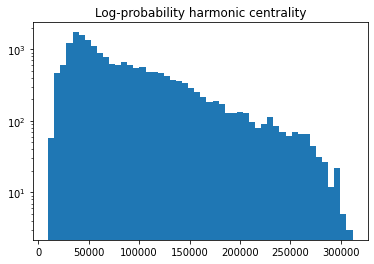

Let's see which of the proteins in this graph have the highest log-probability harmonic centrality:

,probability_harmonic,protein
0,311623.75000,9615.ENSCAFP00000009045
1,309228.53125,9615.ENSCAFP00000002749
2,308976.59375,9615.ENSCAFP00000028908
3,302947.78125,9615.ENSCAFP00000059729
4,302478.50000,9615.ENSCAFP00000060934
5,301902.84375,9615.ENSCAFP00000037353
6,301603.65625,9615.ENSCAFP00000028391
7,300133.46875,9615.ENSCAFP00000004344
8,299139.53125,9615.ENSCAFP00000005151
9,298360.21875,9615.ENSCAFP00000054958


In [14]:
harmonic_centrality_report(doggo)

## MusMusculus
The current graph, MusMusculus, has 21266 and 14496230 edges. The diameter of the graph is 7.0.

### Unweighted harmonic centrality
We will now compute the **unweighted** harmonic centrality with the following one-liner:


```python
unweighted_harmonic = graph.get_harmonic_centrality()
```


Computing the unweighted harmonic centrality took 36.64 seconds.

And let's now display the histogram of the unweighted harmonic centralities:

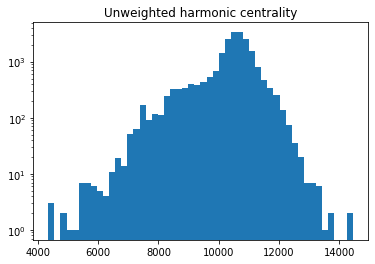

Let's see which of the proteins in this graph have the highest harmonic centrality:

,unweighted_harmonic,protein
0,14439.666992,10090.ENSMUSP00000098066
1,14253.166992,10090.ENSMUSP00000001780
2,13810.333008,10090.ENSMUSP00000104298
3,13726.333008,10090.ENSMUSP00000113942
4,13508.416992,10090.ENSMUSP00000023507
5,13421.150391,10090.ENSMUSP00000083385
6,13402.250000,10090.ENSMUSP00000032399
7,13383.083008,10090.ENSMUSP00000007130
8,13358.233398,10090.ENSMUSP00000019386
9,13299.500000,10090.ENSMUSP00000026572


### Weighted harmonic centrality
We will now compute the **weighted** harmonic centrality with the following one-liner:


```python
weighted_harmonic = graph.get_weighted_harmonic_centrality()
```


Computing the weighted harmonic centrality took 101.7 seconds.

And let's now display the histogram of the weighted harmonic centralities:

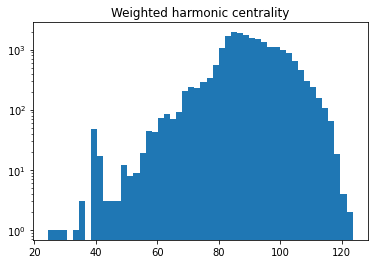

Let's see which of the proteins in this graph have the highest weighted harmonic centrality:

,weighted_harmonic,protein
0,123.557259,10090.ENSMUSP00000083385
1,121.948318,10090.ENSMUSP00000052584
2,120.852135,10090.ENSMUSP00000019386
3,120.378548,10090.ENSMUSP00000015277
4,120.219597,10090.ENSMUSP00000062049
5,120.161026,10090.ENSMUSP00000113942
6,119.580223,10090.ENSMUSP00000071654
7,119.404640,10090.ENSMUSP00000072154
8,119.327477,10090.ENSMUSP00000099465
9,119.103981,10090.ENSMUSP00000129397


### Weight as probabilities harmonic centrality
We will now compute the **probability weights** harmonic centrality with the following couple lines:


```python
# First, we normalize the PPI graph weights which go from 100 to 1000
graph = graph.divide_edge_weights(1000.0)
# then, we compute the centralities
probability_harmonic = graph.get_weighted_harmonic_centrality(
	use_edge_weights_as_probabilities=True
)
```


Computing the probability harmonic centrality took 324.7 seconds.

And let's now display the histogram of the probability harmonic centralities:

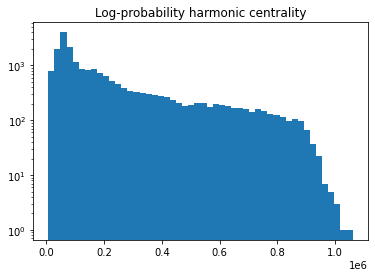

Let's see which of the proteins in this graph have the highest log-probability harmonic centrality:

,probability_harmonic,protein
0,1.060677e+06,10090.ENSMUSP00000023165
1,1.018672e+06,10090.ENSMUSP00000066789
2,1.012957e+06,10090.ENSMUSP00000007130
3,9.988496e+05,10090.ENSMUSP00000026416
4,9.986602e+05,10090.ENSMUSP00000104298
5,9.927552e+05,10090.ENSMUSP00000041902
6,9.858571e+05,10090.ENSMUSP00000099657
7,9.792199e+05,10090.ENSMUSP00000120152
8,9.779614e+05,10090.ENSMUSP00000099658
9,9.770451e+05,10090.ENSMUSP00000080854


In [15]:
harmonic_centrality_report(mouse)

Now that you have a good grasp of Harmonic Centrality and how to compute it with GRAPE, you may want to learn more about [the closeness centrality](https://github.com/AnacletoLAB/grape/blob/main/tutorials/Efficient%20Weighted%20and%20Unweighted%20Closeness%20Centrality%20with%20GRAPE.ipynb) and [how to use HyperBall to compute approximated closeness and harmonic centralities in large graphs](https://github.com/AnacletoLAB/grape/blob/main/tutorials/HyperBall-based%20approximated%20Harmonic%20and%20Closeness%20with%20GRAPE.ipynb) - Consider checking them out!